# Mini Project: Perform Multiple Linear Regression

## Overview
This project focuses on using multiple linear regression to analyze the relationship between sales and various marketing promotion strategies. By leveraging multiple independent variables, such as TV, social media, radio, and influencer promotions, we aim to build a predictive model that estimates sales based on these factors. This project will cover the complete data science pipeline, including data exploration, preprocessing, model building, evaluation, and interpretation.

## Objective
Develop a multiple linear regression model to predict sales based on marketing promotion data. The project will involve exploring the dataset, selecting relevant independent variables, fitting the model, checking assumptions, and interpreting the results to provide actionable insights.

## Learning Outcomes
1. Understand the concept of multiple linear regression and its applications.
2. Learn to preprocess and explore data for regression analysis.
3. Gain experience in fitting and evaluating a multiple linear regression model.
4. Check and validate regression assumptions.
5. Interpret model coefficients and communicate results to stakeholders.

---


## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. The goal is to predict sales based on various marketing promotion strategies, which can help the business optimize its marketing efforts and allocate resources effectively.

### Mini-task:
Write a brief paragraph on how predicting sales using multiple linear regression can benefit the business.

---

Predicting sales using multiple linear regression offers significant benefits to a business. By understanding the relationship between different marketing promotion strategies (TV, social media, radio, influencers) and sales figures, the business can gain valuable insights into which channels are most effective in driving revenue. This allows for more informed decision-making regarding budget allocation, enabling the company to invest more in high-performing channels and potentially reduce spending on less effective ones. Furthermore, the predictive model can be used to forecast future sales based on planned promotional activities, aiding in inventory management, production planning, and overall business strategy. Ultimately, this data-driven approach can lead to increased marketing efficiency, improved return on investment, and enhanced profitability.

## Step 2: Data Collection
### Task:
Collect the dataset required for building the regression model. The dataset used in this project is `marketing_sales_data.csv`, which contains information about TV, social media, radio, and influencer promotions, along with sales data.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first five rows.

```python
import pandas as pd

# Load the dataset
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows
### YOUR CODE HERE ###
```

---

In [1]:
import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1WChLou3qt_JaPjYLZBMHJ8WxSssQ-enL/view?usp=drive_link"
gdd = read_gd(url)

# Loading the dataset
marketing_sales = pd.read_csv(gdd, encoding='latin1')
marketing_sales.to_csv('data/marketing_sales_data.csv', index=False)
# first five rows
print(marketing_sales.head())

       TV      Radio  Social Media Influencer       Sales
0     Low   3.518070      2.293790      Micro   55.261284
1     Low   7.756876      2.572287       Mega   67.574904
2    High  20.348988      1.227180      Micro  272.250108
3  Medium  20.108487      2.728374       Mega  195.102176
4    High  31.653200      7.776978       Nano  273.960377


In [2]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1WChLou3qt_JaPjYLZBMHJ8WxSssQ-enL/view?usp=drive_link"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of variables, identify relationships between variables, and prepare the data for modeling.

### Mini-task:
Create a pairplot to visualize the relationships between continuous variables in the dataset.

#### Hint:
Use `seaborn.pairplot()` to create a pairplot of the continuous variables.

```python
import seaborn as sns

# Create a pairplot of the continuous variables
### YOUR CODE HERE ###
```

---

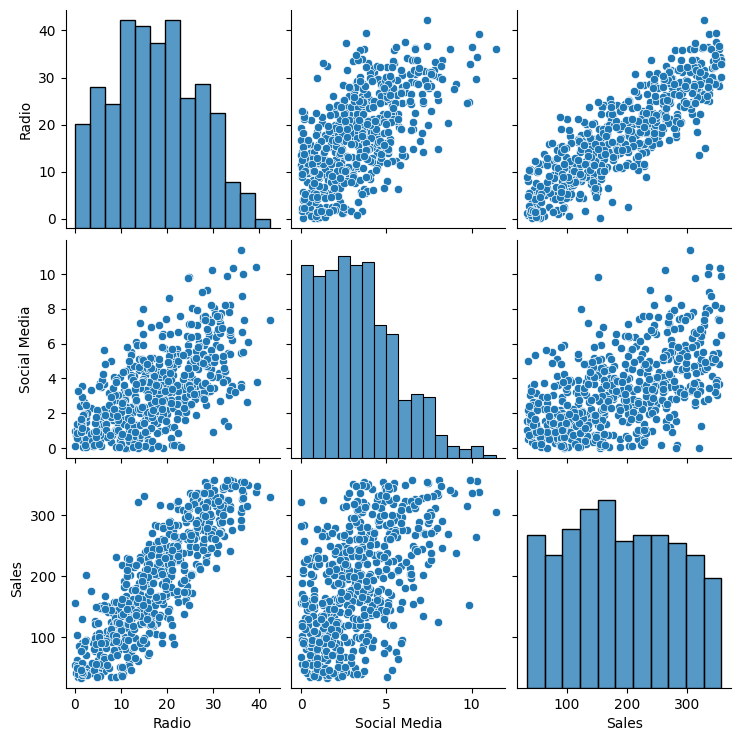

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a pairplot of the continuous variables: Radio, Social Media, and Sales based on the dataset
sns.pairplot(marketing_sales[['Radio', 'Social Media', 'Sales']])
plt.show()


## Step 4: Data Preparation
### Task:
Prepare the data for regression analysis by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Drop rows with missing values and encode categorical variables if necessary.

#### Hint:
Use `data.dropna()` to remove rows with missing values and `pd.get_dummies()` to encode categorical variables.

```python
# Drop rows with missing values
### YOUR CODE HERE ###

# Encode categorical variables (if needed)
### YOUR CODE HERE ###
```

---

In [4]:
import pandas as pd

# Droping rows with missing values
marketing_sales = marketing_sales.dropna()

# Encode categorical variables
marketing_sales_cat = pd.get_dummies(marketing_sales, columns=['TV', 'Influencer'], drop_first=True)

# Display the first few rows after encoding
print(marketing_sales_cat.head())
print(marketing_sales_cat.columns)


       Radio  Social Media       Sales  TV_Low  TV_Medium  Influencer_Mega  \
0   3.518070      2.293790   55.261284    True      False            False   
1   7.756876      2.572287   67.574904    True      False             True   
2  20.348988      1.227180  272.250108   False      False            False   
3  20.108487      2.728374  195.102176   False       True             True   
4  31.653200      7.776978  273.960377   False      False            False   

   Influencer_Micro  Influencer_Nano  
0              True            False  
1             False            False  
2              True            False  
3             False            False  
4             False             True  
Index(['Radio', 'Social Media', 'Sales', 'TV_Low', 'TV_Medium',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano'],
      dtype='object')


## Step 5: Model Building
### Task:
Fit a multiple linear regression model to predict sales using the selected independent variables.

### Mini-task:
Define the OLS formula and fit the model using the `statsmodels` library.

#### Hint:
Use `statsmodels.formula.api.ols()` to define the model and fit it to the data.

```python
import statsmodels.formula.api as smf

# Define the OLS formula
### YOUR CODE HERE ###

# Fit the model
### YOUR CODE HERE ###

# Display the model summary
### YOUR CODE HERE ###
```

---

In [5]:
import statsmodels.formula.api as smf

# Define the OLS formula
# Assuming 'Sales' is the dependent variable and all other columns in marketing_sales_cat are independent variables

# Rename columns with spaces
marketing_sales_cat.columns = [col.replace(' ', '_') for col in marketing_sales_cat.columns]

# Getting the independent variable names (all columns except 'Sales')
independent_variables = [col for col in marketing_sales_cat.columns if col != 'Sales']

# Construct the formula string
ols_formula = 'Sales ~ ' + ' + '.join(independent_variables)
# print(ols_formula)

# Fit the model
model = smf.ols(ols_formula, data=marketing_sales_cat).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Thu, 22 May 2025   Prob (F-statistic):          1.82e-282
Time:                        00:52:35   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Step 6: Model Evaluation
### Task:
Evaluate the model by checking the regression assumptions, including linearity, independence, normality, constant variance, and multicollinearity.

### Mini-task:
Create scatterplots to check the linearity assumption and calculate the residuals to check the normality assumption.

#### Hint:
Use `seaborn.scatterplot()` to create scatterplots and `statsmodels.qqplot()` to check the normality of residuals.

```python
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create scatterplots for linearity
### YOUR CODE HERE ###

# Calculate residuals and create a Q-Q plot
### YOUR CODE HERE ###
```

---

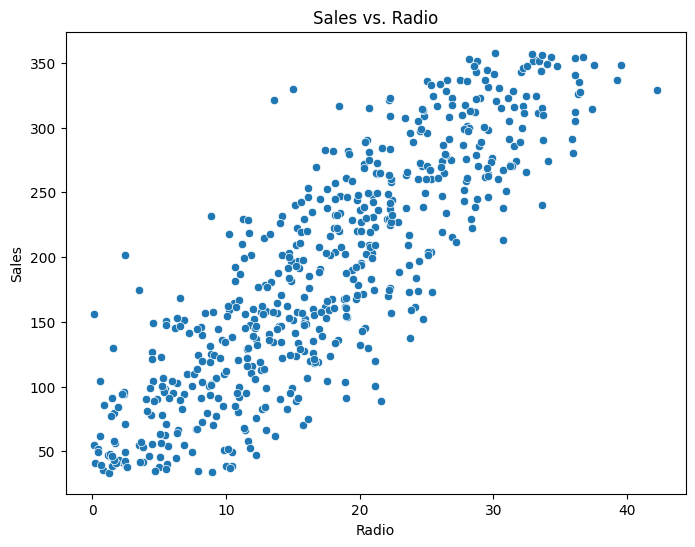

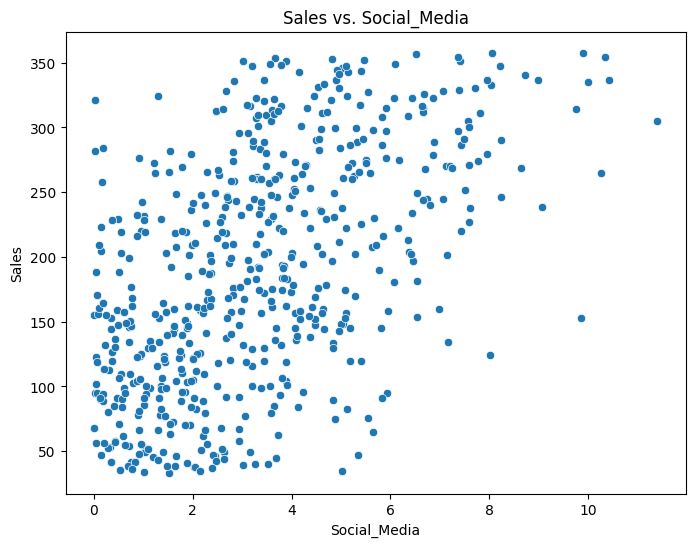

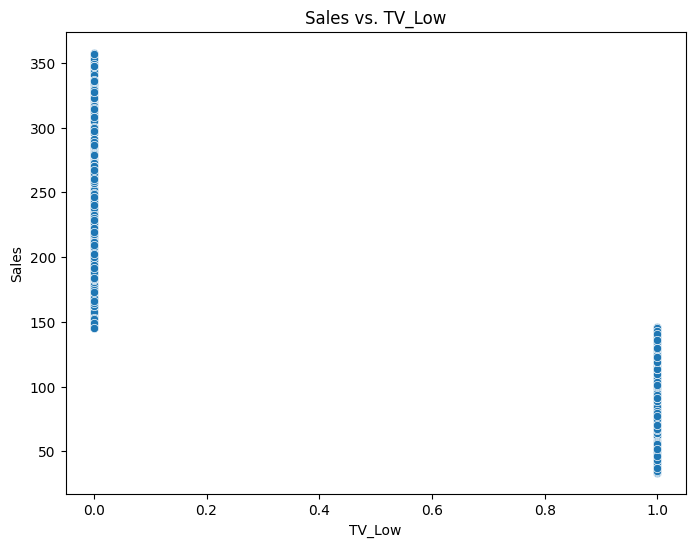

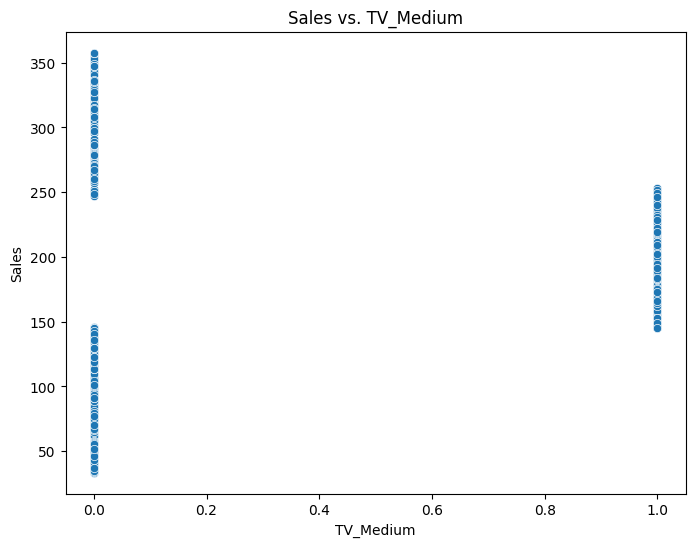

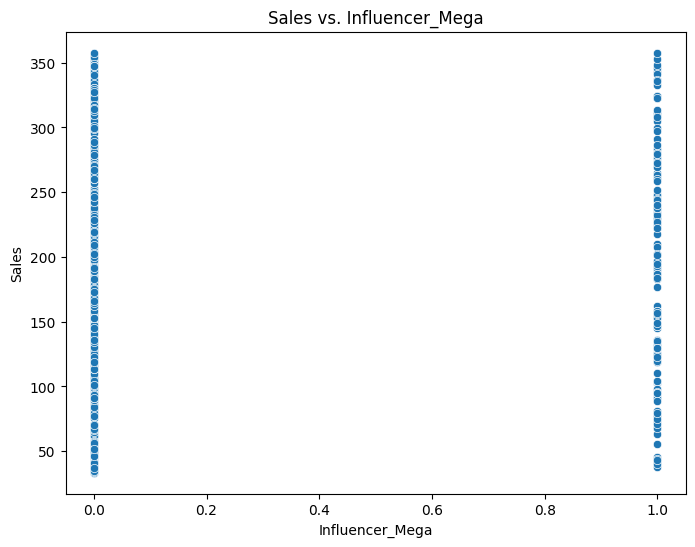

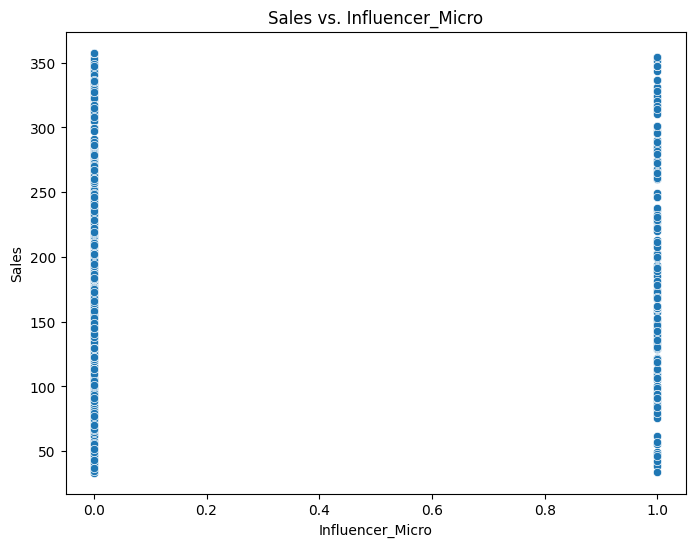

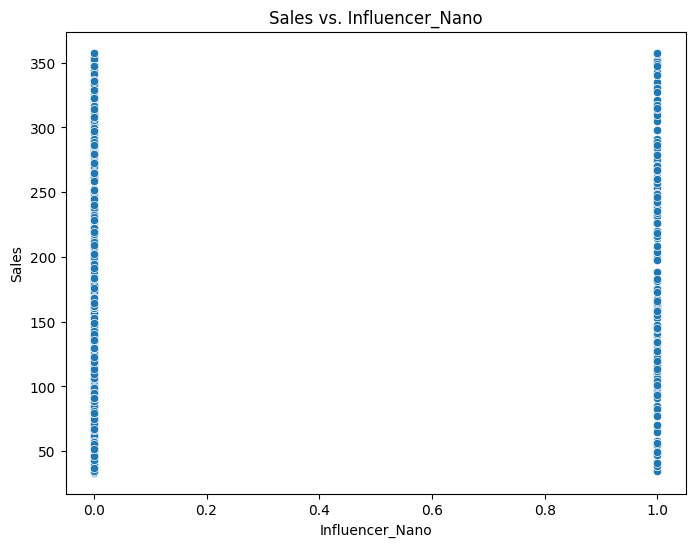

<Figure size 800x600 with 0 Axes>

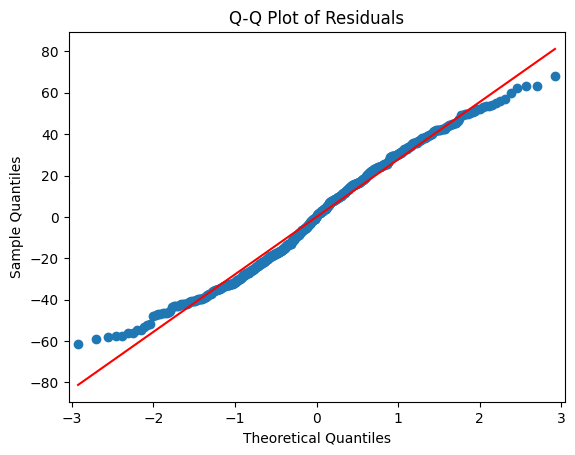

In [8]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Create scatterplots for linearity by Create scatter plots of each independent variable vs. the dependent variable (Sales)
for variable in independent_variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=marketing_sales_cat[variable], y=marketing_sales_cat['Sales'])
    plt.title(f'Sales vs. {variable}')
    plt.xlabel(variable)
    plt.ylabel('Sales')
    plt.savefig(f'media/module1/sales_vs_{variable}.png')
    plt.show()

# residuals
residuals = model.resid

# Create a Q-Q plot to check for normality of residuals
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')  # 's' for standardized line
plt.title('Q-Q Plot of Residuals')
plt.savefig('media/module1/qq_plot_residuals.png')
plt.show()



## Step 7: Results and Interpretation
### Task:
Interpret the model results, including the R-squared value, coefficients, and their statistical significance.

### Mini-task:
Display the model summary and interpret the coefficients.

#### Hint:
Use `model.summary()` to display the model results and interpret the coefficients.

```python
# Display the model summary
### YOUR CODE HERE ###

# Interpret the coefficients
### YOUR CODE HERE ###
```

---

In [ ]:
print(model.summary())
# Displaying the summary of the model
print("The model summary shows the coefficients, standard errors, t-values, and p-values for each independent variable \n The R-squared value indicates how well the independent variables explain the variance in sales \n The p-values indicate the statistical significance of each variable \n Variables with p-values less than 0.05 are considered statistically significant")
print("TV advertising has the strongest impact on sales, with lower spending categories showing substantial sales decreases \n Radio advertising shows a reliable positive effect \n Despite the scatterplots showing some patterns, the influencer marketing variables don't have statistically significant effects in the full model \n Social media spending appears ineffective in this model")

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Sat, 05 Apr 2025   Prob (F-statistic):          1.82e-282
Time:                        21:26:29   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of checking regression assumptions and interpreting model coefficients.
- Consider how the model's insights can be used to optimize marketing strategies.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key metrics.
- Discuss the impact of different marketing strategies on sales.

**What would you share with and recommend to stakeholders?**
- Highlight the key factors that contribute most to sales.
- Recommend strategies to optimize marketing efforts based on the model's insights.

### From analyzing the regression models and diagnostic plots, I've learned that:

Checking regression assumptions is critical - the Q-Q plot showed generally normal residuals with minor deviations at the extremes, validating our OLS approach.
Proper interpretation of coefficients requires attention to both statistical significance and effect size - TV advertising showed both large effect sizes and high significance, while influencer marketing showed neither despite visible patterns in scatterplots.
The high R-squared value (0.904) indicates we've captured most of the relevant factors affecting sales, giving us confidence in the model's predictive power.

### Optimizing Marketing Strategy
Based on the model results, I would recommend:

Prioritizing TV advertising budgets - avoiding "low" TV spending is crucial as it shows a massive negative impact (-154.57 units) on sales.
Increasing radio advertising - each unit investment yields approximately 3 units in sales return, making it a reliable channel.
Reconsidering influencer marketing strategy - despite industry trends, our data shows no statistically significant impact from influencer marketing at any tier (Mega, Micro, or Nano).
Reevaluating social media spending - the negligible coefficient (-0.14) suggests current social media efforts aren't translating to sales.

### For marketing team implementation, I'd recommend:

Shifting budget from influencer and social media to TV and radio
Running controlled experiments to verify if influencer marketing could be effective under different strategies
Developing a more sophisticated attribution model for digital channels

This analysis provides a data-driven foundation for marketing decisions that could significantly improve overall sales performance.